In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [83]:
df = pd.read_csv('UCLA_Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [84]:
df.shape

(500, 9)

In [85]:
df.isnull().sum().sum()

0

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [87]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [88]:
df_copy = df.copy(deep=True)

In [89]:
df_copy.drop('Serial No.', inplace=True, axis=1)

In [90]:
df_copy.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


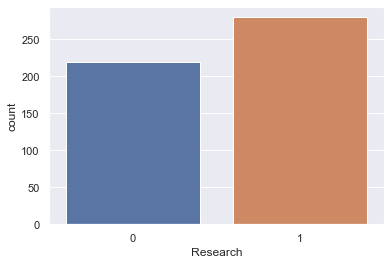

In [91]:
sns.countplot(df_copy['Research'])

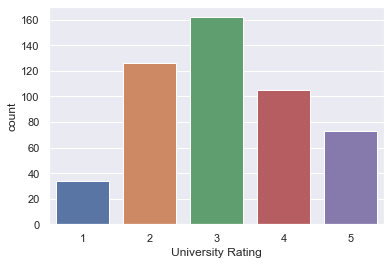

In [92]:
sns.countplot(df_copy['University Rating'])

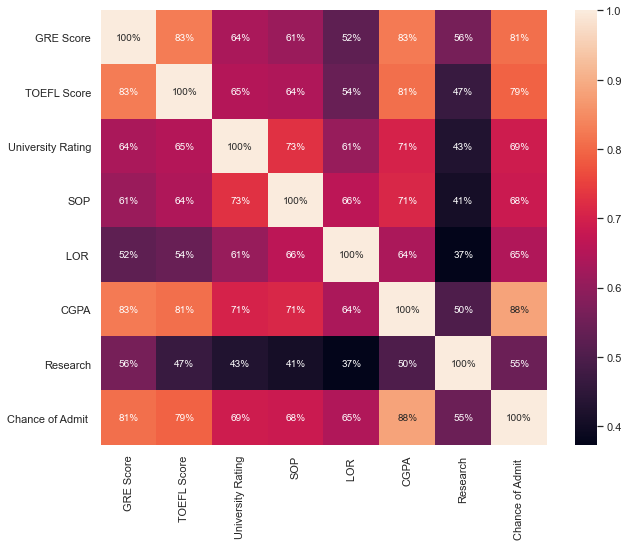

In [93]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df_copy.corr(), annot =True, fmt='.0%')  #HEAT MAP

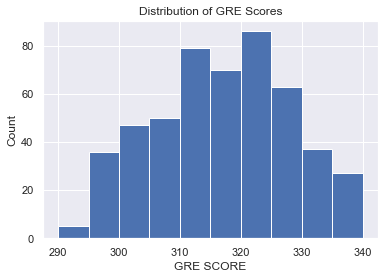

In [94]:
plt.hist(df_copy['GRE Score'])  # Histogram
plt.xlabel('GRE SCORE')
plt.ylabel('Count')
plt.title('Distribution of GRE Scores')
plt.show()

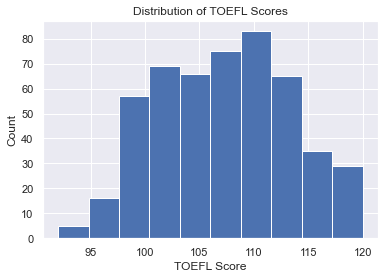

In [95]:
plt.hist(df_copy['TOEFL Score'])  # Histogram
plt.xlabel('TOEFL Score')
plt.ylabel('Count')
plt.title('Distribution of TOEFL Scores')
plt.show()

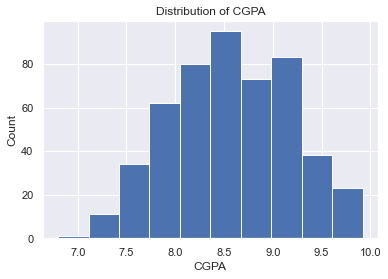

In [96]:
plt.hist(df_copy['CGPA'])  # Histogram
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.title('Distribution of CGPA')
plt.show()

In [16]:
# Replacing the '0' in the dataset (if any), with NaN
df_copy[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Chance of Admit ']] = df_copy[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']].replace(0,np.NaN)

In [17]:
df_copy.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Model Building

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

X = df_copy.iloc[:, :7]
y = df_copy.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 7)
(400,)
(100, 7)
(100,)


In [149]:
def best_models(X, y):
    models = {
        'Linear Regression' : {
            'model' : LinearRegression(),
            'parameters' : {
                'normalize': [True,False]
            }
        },
        
        
        'Decision Tree Regressor' : {
            'model': DecisionTreeRegressor(),
            'parameters' :  {
                 'criterion' : ['mse','mae'],
                 'min_samples_split': [2, 5, 7],
                 'min_samples_leaf' : [5, 10, 15],
                 'max_leaf_nodes' : [2, 5, 8]
            }
        },
        
        
         'Support Vector Regressor' : {
            'model': SVR(),
                'parameters' : { 'kernel' : ['rbf', 'linear'],
                'gamma' : ['scale', 'auto'],
                'C': [1, 3, 5, 7],
            }
        },
        
        'Random Forest Regressor' : {
            'model': RandomForestRegressor(),
                'parameters' : { 'n_estimators' : [2, 5, 7, 10],
                'max_features': ['auto', 'log2', 'sqrt'],
                'criterion': ['mse'],
                'min_samples_split': [2, 5, 7],
                'min_samples_leaf' : [5, 10, 15],
                'max_leaf_nodes' : [2, 5, 8],
            }
        }
        
     }
    
    model_score=[]
    for model_name, model_param in models.items():
        gs = GridSearchCV(model_param['model'], model_param['parameters'], cv =5,return_train_score=False)
        gs.fit(X, y)
        model_score.append({
            'model' : model_name,
            'best_Parameters' : gs.best_params_,
            'score' : gs.best_score_
        })
        
    return pd.DataFrame(model_score, columns=['model', 'best_Parameters', 'score'])

best_models(X, y)


,model,best_Parameters,score
0,Linear Regression,{'normalize': True},0.810802
1,Decision Tree Regressor,"{'criterion': 'mae', 'max_leaf_nodes': 8, 'min...",0.750565
2,Support Vector Regressor,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.782325
3,Random Forest Regressor,"{'criterion': 'mse', 'max_features': 'auto', '...",0.790422


Since Linear Regression model gives the best score, we will continue ahead with selecting this model 

In [148]:
from sklearn.model_selection import cross_val_score, KFold
cvs = cross_val_score(lr, X_train, y_train, cv =5)
print(cvs)
print('Highest Accuracy :',cvs.mean()*100)

[0.82416586 0.72346539 0.8216056  0.78997697 0.88029422]
Highest Accuracy : 80.79016094502869


In [137]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [139]:
lr_score = lr.score(X_test, y_test)
lr_score

0.8188432567829627

Predicting Value

In [161]:
#Prediction 1:
# Input values as : ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
print('The chances of your getting an Admit is {}%'.format(lr.predict([[325, 110, 3.5, 4, 3.5, 8.9, 1]])[0]*100))


The chances of your getting an Admit is 80.138781142346%


In [163]:
#prediction 2: My Score
print('The chances of your getting an Admit is {}%'.format(lr.predict([[311, 102, 3.5, 4, 3.5, 6.4, 1]])[0]*100))

The chances of your getting an Admit is 46.20209758220999%
